# Synopsis

Plotly's Python graphing library makes interactive, publication-quality graphs online.

1) Tables

2) Line Plots

3) Bar Charts

4) Timeseries

# Import the plotly packages


In [1]:
import pandas as pd
import plotly.graph_objs as go
import warnings

warnings.filterwarnings('ignore')

# First plot

## Using Figure

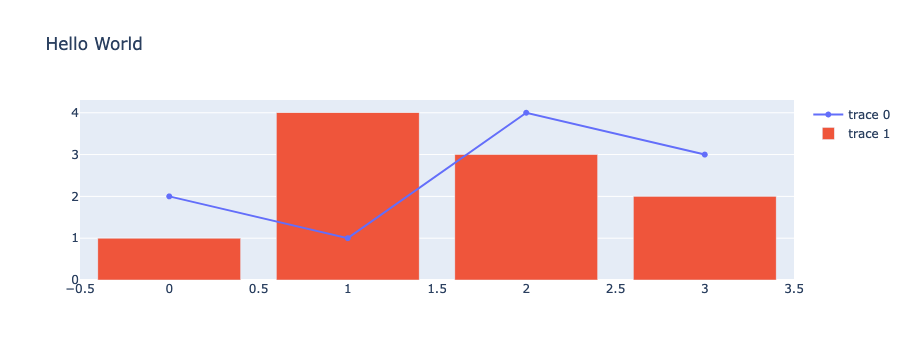

In [2]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=[2, 1, 4, 3]))
fig.add_trace(go.Bar(y=[1, 4, 3, 2]))
fig.update_layout(title = 'Hello World')
fig.show()

## Using FigureWidget

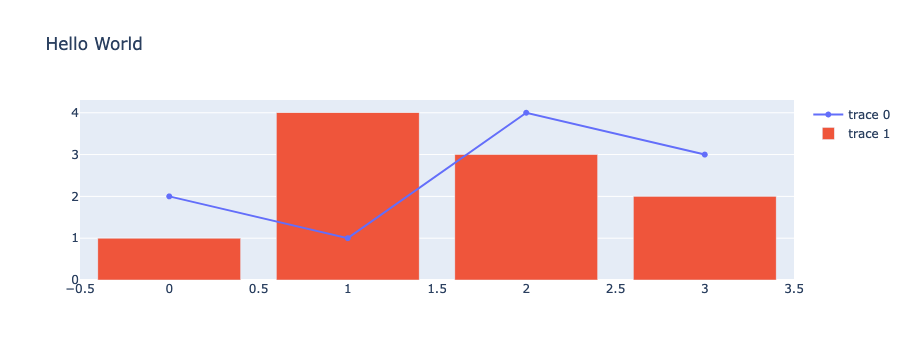

In [3]:
fig = go.FigureWidget()
fig.add_trace(go.Scatter(y=[2, 1, 4, 3]))
fig.add_trace(go.Bar(y=[1, 4, 3, 2]))
fig.update_layout(title = 'Hello World')
fig.show()

# Tables

## Load in some data

Create a small table, in this case SP500 grouped by Sector and all columns aggregated on the mean

# Import libraries

In [4]:
# If you have it saved in Google Drive and want to access it from a machine that does not have the data locally
sheet_id = "1KQSn4NLLVtJHy5ymVYrMk3Ne-pmC75jN"

sheet_name = "SP500"
dwn_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
spx_raw_df = pd.read_csv(
    dwn_url,
    index_col='Symbol'
)

spx_df = spx_raw_df.groupby(by='Sector').mean()
spx_df.head(2)

Price  Price/Earnings  Earnings/Share  \
Sector                                                               
Consumer Discretionary  124.034524       25.536024        4.879048   
Consumer Staples         79.764118       21.963235        3.659412   

                        52 Week High  52 Week Low  
Sector                                             
Consumer Discretionary    146.931427    96.092364  
Consumer Staples           92.832285    68.929441

## First Table

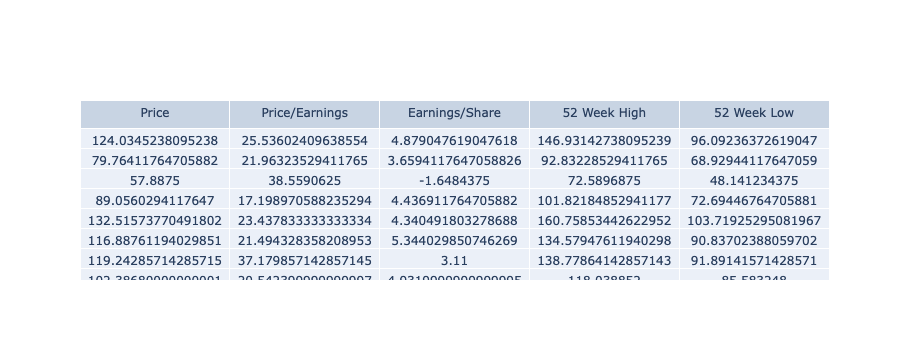

In [5]:
col_names = list(spx_df.columns)
header_data = dict(values = col_names)

data = [spx_df['Price'],
        spx_df['Price/Earnings'],
        spx_df['Earnings/Share'],
        spx_df['52 Week High'],
        spx_df['52 Week Low']
       ]
cell_data   = dict(values = data)

tbl = go.Table(header = header_data,
               cells = cell_data)

fig = go.Figure(data = tbl)

fig.show();

## Add Some Style

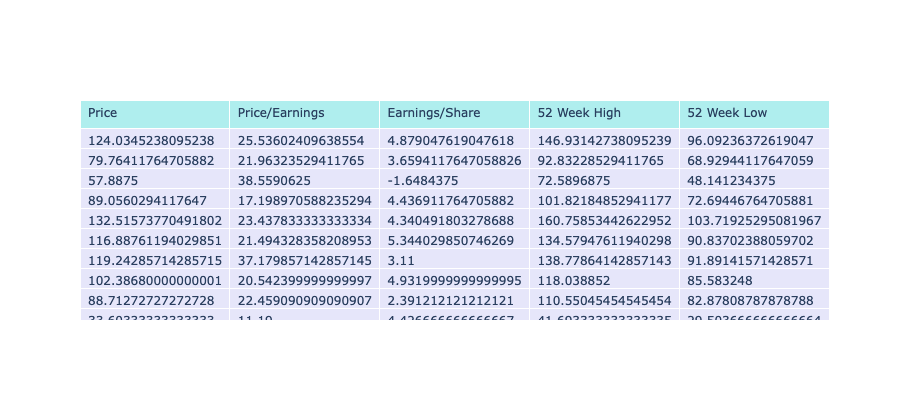

In [6]:
col_names = list(spx_df.columns)
header_data = dict(values = col_names,
                   fill_color='paleturquoise',
                   align = 'left')

data = [spx_df['Price'],
        spx_df['Price/Earnings'],
        spx_df['Earnings/Share'],
        spx_df['52 Week High'],
        spx_df['52 Week Low']
       ]
cell_data  = dict(values = data, 
                  fill_color = 'lavender',
                  align = 'left')
    
tbl = go.Table(header = header_data,
               cells = cell_data)

fig = go.Figure(data = tbl)
fig.update_layout(width=800, height=400)
fig.show();

## Add some formatting

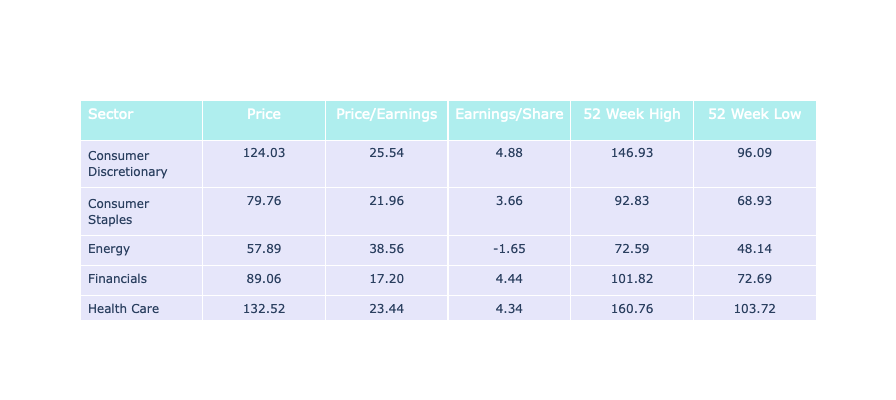

In [7]:
col_names = list(spx_df.columns)
col_names.insert(0,'Sector')
header_data = dict(values = col_names,
                   fill_color='paleturquoise',
                   align=['left','center'],
                   font=dict(color='white', size=14),
                   height=40)

data = [spx_df['Price'],
        spx_df['Price/Earnings'],
        spx_df['Earnings/Share'],
        spx_df['52 Week High'],
        spx_df['52 Week Low']
       ]
data.insert(0, list(spx_df.index))
cell_data  = dict(values = data, 
                  fill_color = 'lavender',
                  align=['left', 'center'],
                  font_size=12,
                  format = [None,",.2f"],
                  height=30)
    
tbl = go.Table(header = header_data, cells = cell_data)

fig = go.Figure(data = tbl)
fig.update_layout(width=800, height=400)
fig.show()

## Alternate Row Colours

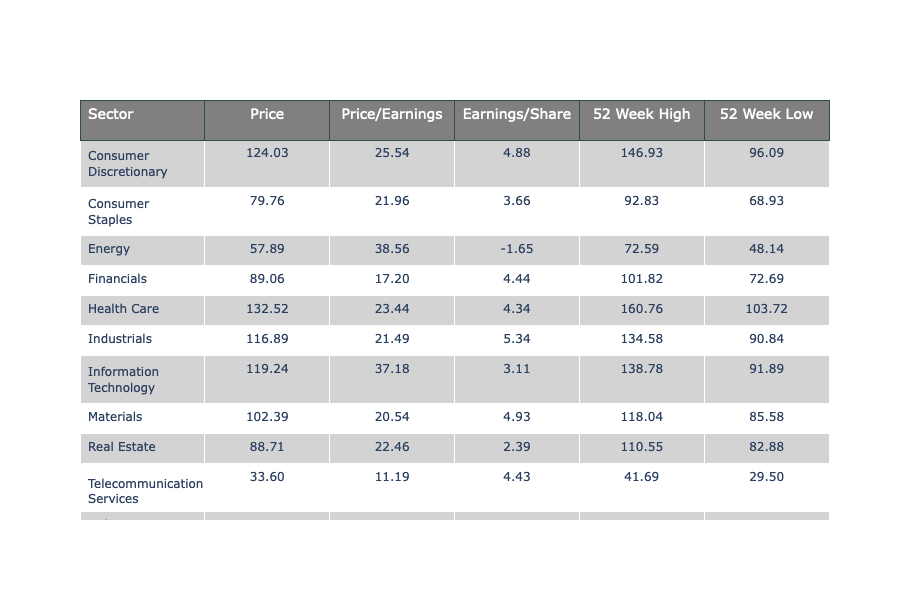

In [8]:
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

col_names = list(spx_df.columns)
col_names.insert(0,'Sector')
header_vals = dict(values = col_names,
                   line_color='darkslategray',
                   fill_color=headerColor,
                   align=['left','center'],
                   font=dict(color='white', size=14),
                   height=40)

data = [spx_df['Price'],
        spx_df['Price/Earnings'],
        spx_df['Earnings/Share'],
        spx_df['52 Week High'],
        spx_df['52 Week Low']
       ]
data.insert(0, list(spx_df.index))
fill_colours = [ [rowEvenColor 
                  if spx_df.index.get_loc(i)%2==0 else rowOddColor 
                  for i in spx_df.index] * len(spx_df.columns) ]
cell_vals  = dict(values = data, 
                  fill_color = fill_colours,
                  align=['left', 'center'],
                  font_size=12,
                  format = [None,",.2f"],
                  height=30)
    
tbl = go.Table(header = header_vals, cells = cell_vals)

fig = go.Figure(data = tbl)
fig.update_layout(width=800, height=600)
fig.show()

# Line Plots

Use `go.Scatter()` with a `mode` of `lines` (or some variation)

Create traces
>x = x axis<BR>
>y = y axis<BR>
>mode = type of plot like marker, line or line + markers<BR>
>name = name of the plots<BR>
>marker = marker is used with dictionary<BR>
 - color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)<BR>
>text = The hover text (hover is curser)<BR>
    
data<BR>
>a list of traces<BR>

layout = a dictionary of properties
>title = title of layout<BR>
>x axis = it is dictionary<BR>
-title = label of x axis<BR>
-ticklen = length of x axis ticks<BR>
-zeroline = showing zero line or not<BR>

fig<BR>
>data and layout



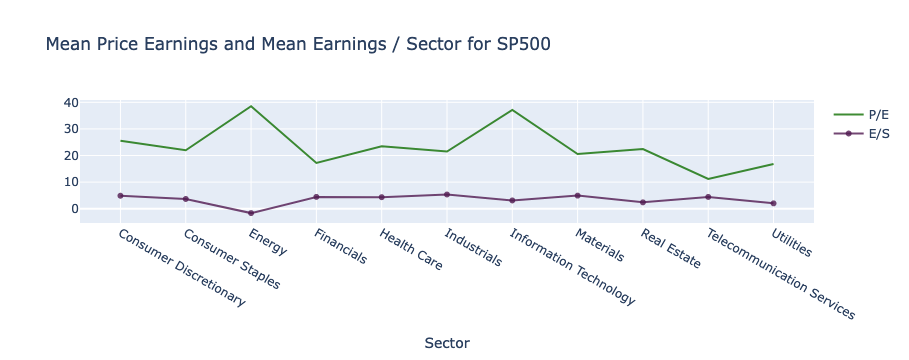

In [9]:
# import graph objects as "go"
import plotly.graph_objs as go

# Trace 1
trace1 = go.Scatter(
                    x = list(spx_df.index),
                    y = spx_df['Price/Earnings'],
                    mode = "lines",
                    name = "P/E",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)')
                    )
# Trace 2
trace2 = go.Scatter(
                    x = list(spx_df.index),
                    y = spx_df['Earnings/Share'],
                    mode = "lines+markers",
                    name = "E/S",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    )
data = [trace1, trace2]
layout = dict(title = 'Mean Price Earnings and Mean Earnings / Sector for SP500',
              xaxis= dict(title= 'Sector',ticklen= 5,zeroline= False)
             )
fig_data = dict(data = data, layout = layout)
fig = go.Figure(data = fig_data )

fig.show()

# Bar Charts


Creating traces
>x = x axis<BR>
>y = y axis<BR>
>mode = type of plot like marker, line or line + markers<BR>
>name = name of the plots<BR>
>marker = marker is used with dictionary<BR>
- color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
- line = It is dictionary. line between bars
- color = line color around bars
>text = The hover text (hover is curser)<BR>

data<BR>
>a list of traces<BR>

layout = a dictionary of properties
>barmode = bar mode of bars like grouped


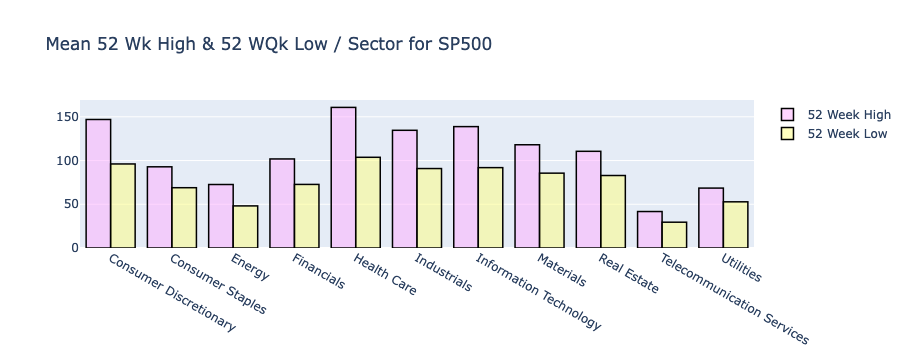

In [10]:
# Trace 1
trace1 = go.Bar(
                x = list(spx_df.index),
                y = spx_df['52 Week High'],
                name='52 Week High',
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5))
                )
# Trace 2
trace2 = go.Bar(
                x = list(spx_df.index),
                y = spx_df['52 Week Low'],
                name='52 Week Low',
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5))
                )

data = [trace1, trace2]
layout = go.Layout(barmode = "group",
                   title = 'Mean 52 Wk High & 52 WQk Low / Sector for SP500')
fig = go.Figure(data = data, layout = layout)

fig.show()

In [11]:
spx_df.head()

Price  Price/Earnings  Earnings/Share  \
Sector                                                               
Consumer Discretionary  124.034524       25.536024        4.879048   
Consumer Staples         79.764118       21.963235        3.659412   
Energy                   57.887500       38.559063       -1.648438   
Financials               89.056029       17.198971        4.436912   
Health Care             132.515738       23.437833        4.340492   

                        52 Week High  52 Week Low  
Sector                                             
Consumer Discretionary    146.931427    96.092364  
Consumer Staples           92.832285    68.929441  
Energy                     72.589687    48.141234  
Financials                101.821849    72.694468  
Health Care               160.758534   103.719253

# Time Series

In [12]:
# If you have it saved in Google Drive and want to access it from a machine that does not have the data locally
sheet_id = "1JEwsXcGSXeb43CsHq2YM-NDh2C4hu15y"

# Google data
sheet_name = "AAPL"
dwn_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
aapl_df = pd.read_csv(
    dwn_url,
    index_col = "Date",
    parse_dates = True
)

aapl_df.head(2)

High       Low      Open     Close     Volume  Adj Close
Date                                                                    
2000-01-03  4.017857  3.631696  3.745536  3.997768  133949200   3.478462
2000-01-04  3.950893  3.613839  3.866071  3.660714  128094400   3.185191

## Using plotly Express

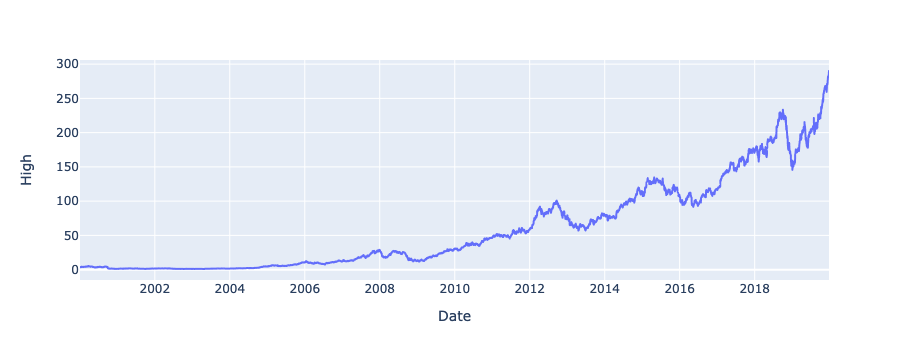

In [13]:
import plotly.express as px

fig = px.line(aapl_df,
              x=aapl_df.index,
              y='High'
             )

fig.show();

## Using Graph Objects

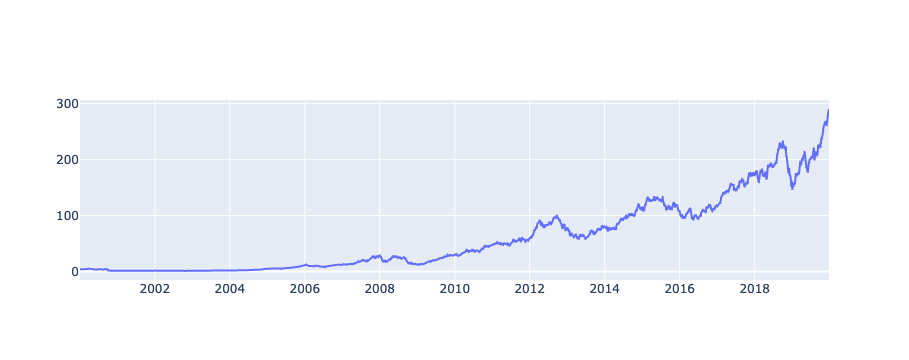

In [14]:
trace = go.Scatter(x=aapl_df.index,
                   y=aapl_df['High'])

data = [trace]

fig = go.Figure(data = data)

fig.show();

## Custom Date Range

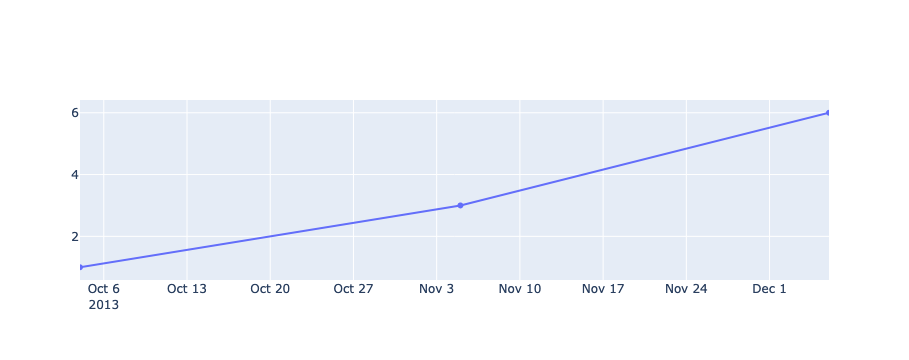

In [15]:
from datetime import datetime

x = [datetime(year=2013, month=10, day=4),
     datetime(year=2013, month=11, day=5),
     datetime(year=2013, month=12, day=6)]


trace = go.Scatter(x=x, y=[1, 3, 6])

data = [trace]

fig = go.Figure(data=data)

# Use datetime objects to set xaxis range
fig.update_layout(xaxis_range=[x[0],x[2]])
fig.show();

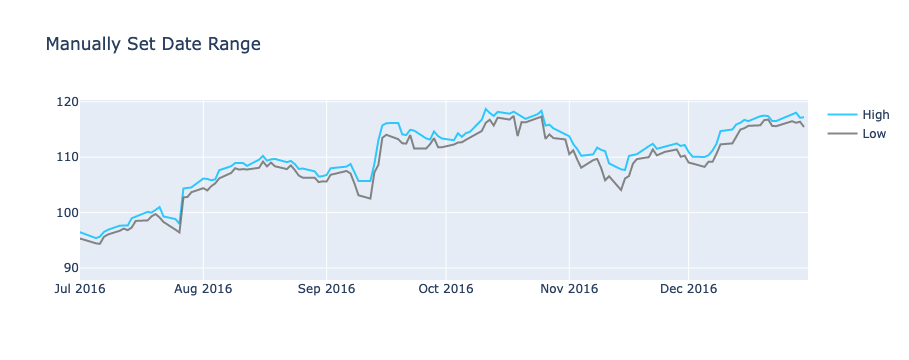

In [16]:
trace1 = go.Scatter(x=aapl_df['2016'].index,
                    y=aapl_df['2016']['High'],
                    name="High",
                    line_color='deepskyblue',
                    opacity=0.8)

trace2 = go.Scatter(x=aapl_df['2016'].index,
                    y=aapl_df['2016']['Low'],
                    name="Low",
                    line_color='dimgray',
                    opacity=0.8)


data = [trace1, trace2]

fig = go.Figure(data=data)

# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2016-07-01','2016-12-31'],
                  title_text="Manually Set Date Range")
fig.show()

## Time Series With Rangeslider

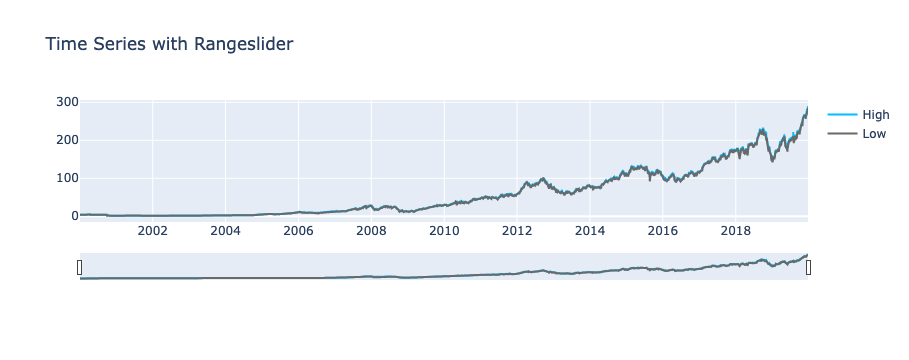

In [17]:
trace1 = go.Scatter(x=aapl_df.index,
                    y=aapl_df['High'],
                    name="High",
                    line_color='deepskyblue'
                   )

trace2 = go.Scatter(x=aapl_df.index,
                    y=aapl_df['Low'],
                    name="Low",
                    line_color='dimgray')

data= [trace1, trace2]

fig = go.Figure(data=data)

fig.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_rangeslider_visible=True)
fig.show()